# CMM262: Statistics, Day 2 (Choosing the Right Statistical Test) - `Supplemental Code`

**Authors**: Michelle Franc Ragsac (mragsac@eng.ucsd.edu) and Clarence Mah (ckmah@ucsd.edu) 

There were a few things that we weren't able to cover in the main notebook, so we've placed them here for you to reference on your own! 

---

## Are My Variables Related? 

A common question that is asked within biology is if there's some sort of relation between some condition and some observed output, or between two variables! We can evaluate how related two variables are to each other by calculating the **correlation** between them. 

However, before we jump deeper into this topic, it's important to note that **correlation does not always equal causation**! 

![cheese and death by bed sheets correlation](img/day2_death_by_cheese.png)

> Reference: http://www.tylervigen.com/spurious-correlations

---

## Visualizing the Relationship Between Two Variables of Interest

The `sns.jointplot` function draws a plot of two variables with a scatterplot in the center and distribution plots on the axes.

Let's visualize the relationship between `flipper length` and `body mass` from the Palmer Penguins Dataset, specifically in the **Chinstrap penguins**.

Variables used in the `sns.jointplot` command:
- **`x`**: variable to plot on the x-axis
- **`y`**: variable to plot on the y-axis
- **`kind`**: `kind=reg` specifies a scatter plot with a **linear regression** line in the main plot

In [1]:
# Import the seaborn library to generate visualizations 
import seaborn as sns

In [2]:
# Load the penguins dataset, then subset the dataset to obtain the chinstrap data points 
penguins  = sns.load_dataset("penguins")
chinstrap = penguins.loc[penguins["species"] == "Chinstrap"]

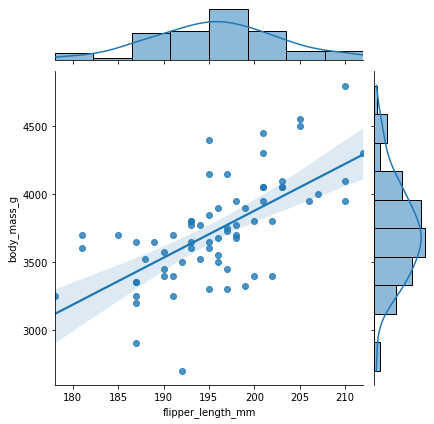

In [3]:
# Generate a joint plot to visualize the relationship between chinstrap flipper length and body mass
sns.jointplot(x=chinstrap['flipper_length_mm'], y=chinstrap['body_mass_g'], kind='reg')

Alternatively, we use the `sns.pairplot()` method to visualize pairwise relationships between all quantitative variables. This time we can specify `kind='reg'` to plot a linear regression line on top of the scatter plots.

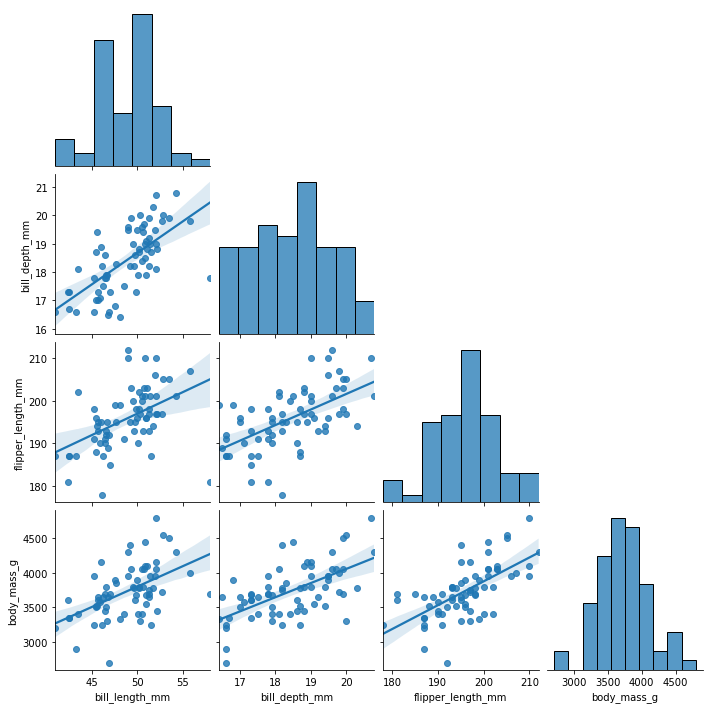

In [4]:
# Visualize all correlations between quantitative variables in our chinstrap penguin dataset 
sns.pairplot(chinstrap, kind='reg', corner=True)

---

## Calculating the Correlation Coefficient between Two Quantitative Variables using the `scipy.stats.pearsonr()` and `scipy.stats.spearmanr()` Methods

However, the plots above don't show the correlation values between our quantitative variables! We can instead use the `scipy.stats.pearsonr()` method to calculate the Pearson Correlation between two variables, as well as the `scipy.stats.spearmanr()` method to calculate the Spearman Correlation.

<div class="alert alert-block alert-success">
    <b>Exercise:</b> Based on the distribution of each variable we plotted above, is it appropriate to use a parametric test on flipper length and body mass to evaluate the <b>Chinstrap</b> penguin samples?
</div>

Let's calculate the Pearson and Spearman correlations between the flipper length and body mass for our Chinstrap penguins! 

In [5]:
# Import the stats module from the scipy method as it contains the correlation calculation methods
from scipy import stats

### Calculate the Pearson Correlation (Parametric) between Chinstrap Penguin Flipper Length and Body Mass

In [6]:
stats.pearsonr(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'])

(0.6415594129316967, 3.748129999231685e-09)

### Calculate the Spearman Correlation (Non-Parametric) between Chinstrap Penguin Flipper Length and Body Mass

In [7]:
stats.spearmanr(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'])

SpearmanrResult(correlation=0.6704870859696377, pvalue=3.9832788379392077e-10)

### Compute all Pairise Pearson Correlations in our Chinstrap Dataset using the `DataFrame.corr()` Method

The two methods from the `scipy.stats` module are good if you would like to calculate a single pairwise correlation, however, we can also use the convenient `DataFrame.corr()` method to compute all possible pairwise column correlations within our `DataFrame`! The `DataFrame.corr()` method takes in a parameter, `method`, which allows you to set the correlation method you would like to use to calculate your correlation coefficient values. 

In [8]:
# Calculate all possible pairwise correlation between our columns using the corr() method
chinstrap.corr(method='pearson')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.653536,0.471607,0.513638
bill_depth_mm,0.653536,1.000000,0.580143,0.604498
flipper_length_mm,0.471607,0.580143,1.000000,0.641559
body_mass_g,0.513638,0.604498,0.641559,1.000000


---

## Performing a Power Analysis
https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26


power analysis

4 metrics to consider:
- significance level
- effect size
- power
- sample size

power analysis = determining the value of one metric given values for the other three
- we have seen significance level (p-values), and sample size (number of samples)

effect size
- small, medium, large = 0.2, 0.5, 0.8 (Cohen's d) 

define power, type1 and type2 errors
- Power = P(reject H0 | H1 is true) = 1 - P(fail to reject H0 | H0 is false)
- common to design experiments with 80% power -> 20% probability of of committing a Type II error

In [ ]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

# TODO initialize object intro

In [ ]:
power_analysis = TTestIndPower()

How large of a sample do we need to collect for our experiment, if we accept power at the level of 80%, set a significance level at 5% and the expected effect size = 0.8 (strong effect)?

In [ ]:
strong_effect_size = 0.8
medium_effect_size = 0.5
weak_effect_size = 0.2

power = 0.8
alpha = 0.05

In [ ]:
power_analysis.solve_power(effect_size=strong_effect_size, power=power, alpha=alpha)

We can plot how sample size influences power, while keeping our significance level and effect size the same.

In [ ]:
sns.set_style('darkgrid')
power_analysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(2, 200),
    effect_size=[strong_effect_size],
    alpha=alpha,
    title='Power of t-Test at alpha=0.05'
);
plt.axhline(0.8, color='red', linestyle='--')

In [ ]:
sns.set_style('darkgrid')
power_analysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(2, 200),
    effect_size=[weak_effect_size, medium_effect_size, strong_effect_size],
    alpha=alpha,
    title='Power of t-Test at alpha=0.05'
);
plt.axhline(0.8, color='gray', linestyle='--')

We can hold any two parameters constant and vary the third to understand its effect on power. Let's observe how varying our significance level influences power.

In [ ]:
sns.set_style('darkgrid')
power_analysis.plot_power(
    dep_var="alpha",
    nobs=[10, 25, 50],
    effect_size=strong_effect_size,
    alpha=np.arange(0,0.2, 0.0001),
    title='Power of t-Test at effect_size=0.8'
);
plt.axhline(0.8, color='gray', linestyle='--')
plt.axvline(0.05, color='gray', linestyle='--')